In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("mushrooms.csv")

In [3]:
dataset.head(10)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,...,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,...,s,w,w,p,w,o,p,k,s,m


In [4]:
le = LabelEncoder() 
df = dataset.apply(le.fit_transform)

In [5]:
df.head(10)

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,7,7,0,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,7,7,0,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,7,7,0,2,1,4,2,3,3


In [6]:
df = df.values
x = df[:,1:]
y = df[:,0]

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [8]:
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(6499, 22) (6499,) (1625, 22) (1625,)


In [10]:
print(y_test[0])

0


In [11]:
def prior_prob(y_train,label):
    
    return(np.sum(y_train==label))
    
    

In [12]:
def cond_prob(x_train,y_train,feature_col,feature_val,label):
    x_filtered = x_train[y_train==label]
    numerator = np.sum(x_filtered[:,feature_col]==feature_val)
    denominator = np.sum(y_train==label)
    
    return numerator/float(denominator)

In [13]:
def predict(x_train,y_train,xtest) :
    features = x_train.shape[1]
    classes = np.unique(y_train)
    post_probs = []
    for label in classes :
        likelihood = 1.0
        for f in range(features):
            cond = cond_prob(x_train,y_train,f,xtest[f],label)
            likelihood *= cond
        
        prior = prior_prob(y_train,label)
        post =  likelihood*prior
        post_probs.append(post)
    
    pred = np.argmax(post_probs)
    return pred    
            
    

In [14]:
output = predict(x_train,y_train,x_test[1])
print(output)
print(y_test[1])

1
1


In [15]:
def score(x_train,y_train,x_test,y_test):
    pred = []
        
    for i in range(x_test.shape[0]):
        p = predict(x_train,y_train,x_test[i])
        pred.append(p)
    pred=np.array(pred)
    s = np.sum(pred == y_test)/y_test.shape[0]
    return s


In [16]:
score(x_train,y_train,x_test,y_test)

0.9956923076923077

# MNIST_Using_Multinomial and Gaussian_NaiveBayes

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [3]:
digits = load_digits()

In [13]:
X = digits.data
Y = digits.target

In [14]:
print(X.shape)
print(Y.shape)

(1797, 64)
(1797,)


0


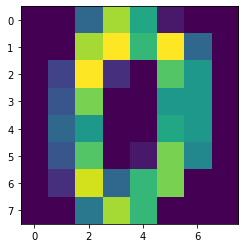

In [17]:
plt.imshow(X[0].reshape(8,8))
print(Y[0])

In [19]:
print(X[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [21]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [26]:
mnb = MultinomialNB()
gnb = GaussianNB()

In [27]:
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
print(mnb.score(X,Y))
print(gnb.score(X,Y))

0.9053978853644964
0.8580968280467446
